# 배치 정규화 수행

In [ ]:
import torch
from torch import nn


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

print(nn.BatchNorm1d(3)(x))

tensor([[-1.3246, -1.3492, -0.3756],
        [ 1.0912,  0.3077,  1.3685],
        [ 0.2334,  1.0415, -0.9930]], grad_fn=<NativeBatchNormBackward0>)


In [ ]:
#배치 정규화 클래스
m=torch.nn.BatcchNorm1d(
    num_features, #특징 개수를 입력받아 배치 정규화 수행, 입력 데이터의 채널 수
    eps=1e05 #분모가 0이 되는 현상 방지
)

AttributeError: module 'torch.nn' has no attribute 'BatcchNorm1d'

# 가중치 초기화

In [8]:
from torch import nn

class Net (nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(1,2),
        nn.Sigmoid()

    )
    self.fc = nn.Linear(2,1) #원소 호출 없이 가중치와 편향을 초기화
    self._init_weights()

  def _init_weights(self): #여기서 모델 매개변수의 초깃값을 설정함, 밑줄(_)을 붙여 프로텍티드 메서드로 사용
    nn.init.xavier_uniform_(self.layer[0].weight) #가중치는 제이비어 초기화 적용
    self.layer[0].bias.data.fill_(0.01) #편향은 상수 초기화 적용

    nn.init.xavier_uniform_(self.fc.weight)
    self.fc.bias.data.fill_(0.01)


model = Net()

In [9]:
#가중치 초기화 메서드를 모듈화해 적용
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module): #module 매개변수 추가
        if isinstance(module, nn.Linear): #객체 식별 함수로 선형 변환 함수라면 가중치와 편향 초기화
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01) #상수 초기화
        print(f"Apply : {module}")


model = Net()

Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


# 정칙화

In [ ]:
#L1 정칙화 적용 방식
for x, y in train_dataloader:
  x = x.to(device)
  y= y.to(device)

  output = model(x)

  _lambda = 0.5 #여러 번 반복해 최적의 _lambda 값을 찾아야 함.
  l1_loss = sum(p.abs().sum() for p in model.parameters()) #가중치 절댓값의 합을 사용

  loss = criterion(output,y)+_lambda * l1_loss


NameError: name 'train_dataloader' is not defined

In [ ]:
#L2 정칙화 적용 방식
for x, y in train_dataloader:
  x = x.to(device)
  y= y.to(device)

  output = model(x)

  _lambda = 0.5 #여러 번 반복해 최적의 _lambda 값을 찾아야 함.
  l2_loss = sum(p.pow(2.0).sum() for p in model.parameters()) #모델 매개변수의 제곱 ㄱ밧을 계산

  loss = criterion(output,y)+_lambda * l2_loss


NameError: name 'train_dataloader' is not defined

In [ ]:
#가중치 감쇠
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

NameError: name 'torch' is not defined

In [ ]:
#드롭아웃 적용 방식

from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5) #p는 베르누이 분포의 모수를 의미, 각 노드의 제거여부를 확률적으로 선택
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

In [ ]:
#그레이디언트 클리핑 함수
grad_norm=torch.nn.utils.clip_grad_norm_( #grad_norm은 전체 노름 단일 벡터를 반환한다는 뜻으로 매개변수를 직접 수정
    parameters, #매개변수를 전달
    max_norm, #최대 노름을 초과하는 경우 기울기를 잘라냄
    norm_type=2.0 #클리핑을 계산할 노름 유형을 설정
)

NameError: name 'torch' is not defined

In [ ]:
#그레이디언트 클리핑 적용하기
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward() #역전파 수행

    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1) #그레이디언트 클리핑 함수 사용, 최댓값을 규제하려고 0.1 작은 값을 사용함.

    optimizer.step() #최적화 함수 반영

NameError: name 'train_dataloader' is not defined

# 데이터 증강 및 변환

In [1]:
#자연어 처리 데이터 증강 라이브러리 설치
!pip install numpy requests nlpaug transformers sacremoses nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 18.7 MB/s eta 0:00:00


In [2]:
#단어 삽입
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert") #BERT모델 활용해 단어 삽입, 동작(action)은 모델이 수행할 기능 선택, 문장을 삽입 -> insert, 단어 대체 -> substitute
augmented_texts = aug.augment(texts) #augment 메서드를 통해 기존 데이터 증강

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : those who follow can only imagine saying anything, only can create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : we can only see it a relatively short walking distance out ahead, but we can probably see plenty down there that needs washing to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : if such a machine one is expected to be considered infallible, so it cannot really also necessarily be intelligent.
------------------


In [3]:
#삭제
import nlpaug.augmenter.char as nac


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete") #무작위로 문자를 삭제할 수 있음
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : hoe who can mine anthg, can create the imposbl.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can on see a sot dsanc ahd, but we can see plenty the th needs to be dn.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a maci is exeed to be infallible, it cano lo be ntelige.
------------------


In [3]:
#이미지 증강 라이브러리 설치
!pip install imgaug

In [4]:
#단어 교체 1
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.RandomWordAug(action="swap") #swap 교체 기능 제공
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who can imagine, anything can the create impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : Can we only a short see distance ahead, but can see we plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine expected is to infallible, be it cannot be also. intelligent
------------------


In [5]:
#SynonymAug 클래스를 이용한 단어 대체 2
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.SynonymAug(aug_src='wordnet') #워드넷 데이터베이스나 의역 데이터베이스를 활용해 단어 대체해 데이터 증강
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


src : Those who can imagine anything, can create the impossible.
dst : Those world health organization fanny imagine anything, can make the inconceivable.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We fire just see a short distance before, but we force out see plenty there that needs to be exercise.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a auto be expected to be infallible, information technology cannot as well live intelligent.
------------------


In [6]:
#단어교체 3
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
reserved_tokens = [
    ["can", "can't", "cannot", "could"],  #특정한 단어로 대체하는 기능
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens) #특정한 단어로 대체하는 기능
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who cannot imagine anything, could create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We could only see a short distance ahead, but we could see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it could also be intelligent.
------------------


In [7]:
#역번역
import nlpaug.augmenter.word as naw

texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

back_translation = naw.BackTranslationAug( #역번역 클래스
    from_model_name='facebook/wmt19-en-de', #입력모델
    to_model_name='facebook/wmt19-de-en'#출력모델
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : Anyone who can imagine anything can achieve the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only look a little ahead, but we can see a lot there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it cannot be intelligent.
------------------


In [14]:
#통합 클래스 및 변환 적용 방식
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms #라이브러리 변환 모듈, 변환 모듈에 이미지 변환 관련된 기능이 포함되어 있음


transform = transforms.Compose( #통합 클래스
    [
        transforms.Resize(size=(512, 512)), #512 x 512 크기로 변환하고 파이토치에서 사용하는 텐서 타입으로 변환
        transforms.ToTensor() #텐서 타입으로 변환 PTL.Image 형식을 Tensor 형식으로 변환
    ]
)

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
print(transformed_image.shape)


torch.Size([3, 512, 512])


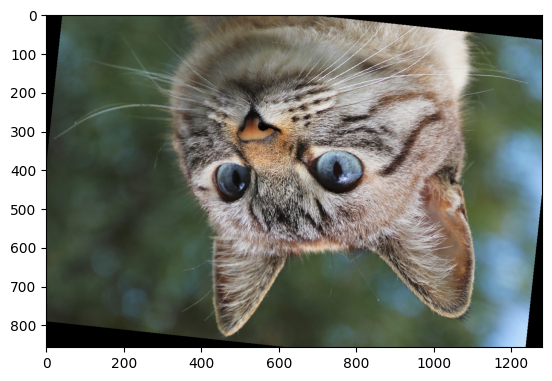

In [17]:
#회전 및 대칭
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None), #무작위 회전 클래스, expand를 true로 하면 엽개이 생기지 않음, center는 중심점을 의미
        transforms.RandomHorizontalFlip(p=0.5), #수평 대칭, 무작위 대칭 클래스로 p는 수행확률로 0.5인 경우에는 50% 확률로 대칭함.
        transforms.RandomVerticalFlip(p=0.5) #수직 대칭
    ]
)

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

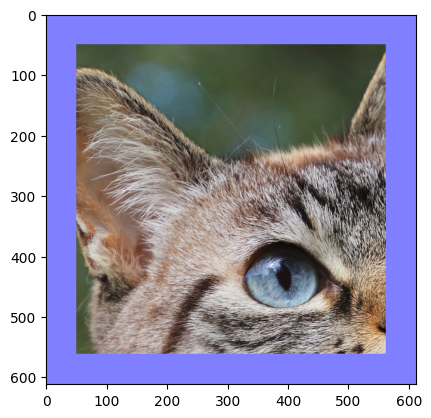

In [18]:
#자르기 및 대칭
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),#무작위 자르기 클래스로 이미지의 높이나 너비가 동일한 정사각형 미지로 자름
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant") #패딩 클래스
        # 이미지 테두리에 특정한 방식이나 고정값으로 이미지를 확장하는 기능 제공
    ]
)
#패딩은 모든 방향으로 적용되므로 612 x 612 크기의 이미지로 변환
image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

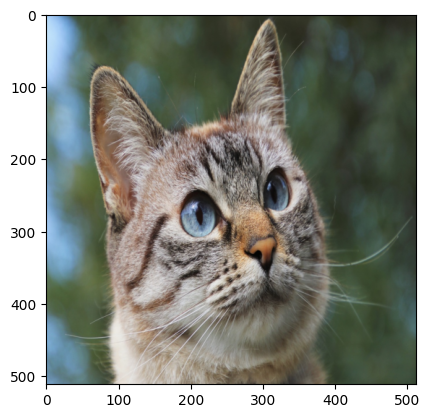

In [19]:
# 크기 조정
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)) #크기를 조정한다. 높이나 너비 중 크기가 더 작은 값에 비율을 맞춰 크기 수정
    ]
)

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

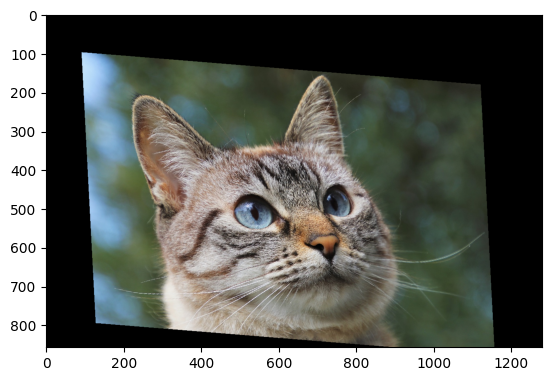

In [21]:
# 아핀 변환
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomAffine( #아핀 변환
            degrees=15, translate=(0.2, 0.2), #각도:최대 15도까지 기울기 , 이동:최대 20%만큼 좌우,상후 움직ㅇ미
            scale = (0.8, 1.2), shear=15 #척도 : 최소 이미지를 80%, 최대 120%까지 크기 조절함, 전단:이미지를 최대 15도가지 비스듬히 함
        )
    ]
)

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

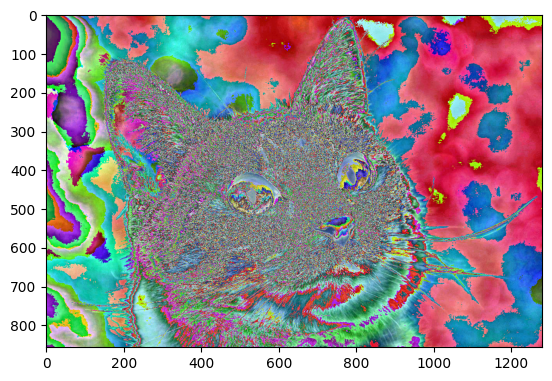

In [22]:
#색상 변환 및 정규화
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.ColorJitter( #색상 변환 클래스
            brightness=0.3, contrast=0.3, #명도, 대비, 채도, 색상 조절
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize( #정규화 클래스
            mean = [0.485, 0.456, 0.406], #평균
            std = [0.229, 0.224, 0.225]  #표준편차
        ),
        transforms.ToPILImage()
    ]
)

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

(857, 1280, 3) uint8


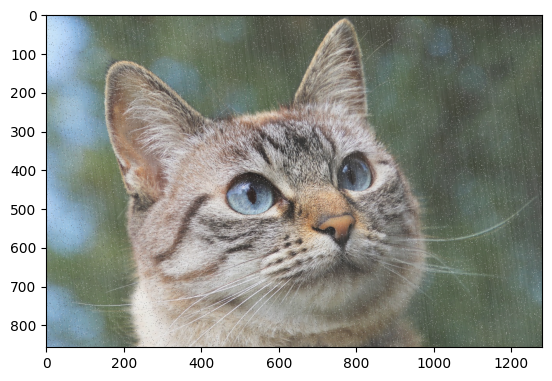

In [23]:
#노이즈
import numpy as np
np.bool = np.bool_ # Deprecated 오류 방지
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa


class IaaTransforms:
    def __init__(self): #초기화 메서드, 증강 방법 설정
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)), #Salt and pepper noise : 점잡음
            iaa.Rain(speed=(0.3, 0.7)) #빗방울 레이어를 적용
        ])

    def __call__(self, images): #호출 메서드
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)


transform = transforms.Compose([
    IaaTransforms()
])

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

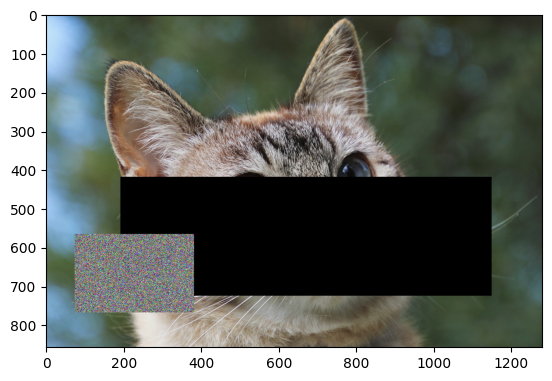

In [25]:
#컷아웃 및 무작위 지우기
from PIL import Image
from torchvision import transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    #컷아웃과 무작위 지우기 모두 무작위 지욱 ㅣ클래스를 통해 적용한다.
    transforms.RandomErasing(p=1.0, value=0), #value 값이 0으로 할당하면 컷아웃,
    transforms.RandomErasing(p=1.0, value='random'), #random으로 할당되면 무작위 지우기
    transforms.ToPILImage() #Tensor를 PIL 이미지 도는 ndarray 배열로 변환함.
])

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

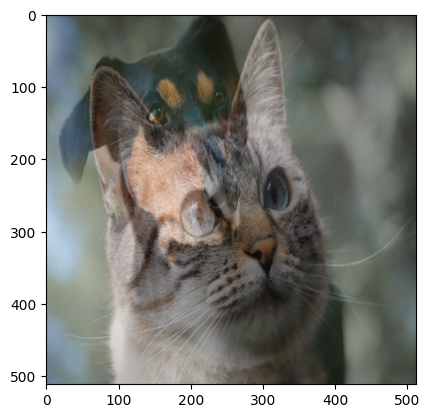

In [28]:
import numpy as np
from PIL import Image
from torchvision import transforms


class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target #혼합하려는 이미지 입력
        self.scale = scale # 이미지 크기 조절
        self.alpha = alpha #각 이미지의 혼합 비율
        self.beta = beta

    def __call__(self, image): #두 이미지를 혼합
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("/content/dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("/content/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)